# Módulo 1 - Sección autónoma

## Caso de estudio - Fumigación aérea en Colombia

Encontramos unos datos sobre la fumigagión aérea en colombia en la [página de la aerocivil](https://www.aerocivil.gov.co/atencion/estadisticas-de-las-actividades-aeronauticas/estadisticas-operacionales). Pasamos el excel a un csv y dejamos los datos en `../data/fumigacionColombia/fumigacionColombiaLimpiosv2.csv`. 

Como vimos ayer, un csv puede tener diferentes delimitadores. Explore el archivo con un editor de texto (recomendamos textpad en windows y TextEdit en MacOS) para ver qué delimitador usa el archivo.

> Usando pandas, cargue los datos en un dataframe y asignelos a una variable llamada `data`. Tenga en cuenta que la función `read_csv` recibe `sep` como parámetro para especificar el delimitador. Pueden ver más info [aca](https://www.geeksforgeeks.org/how-to-read-a-csv-file-to-a-dataframe-with-custom-delimiter-in-pandas/). Recuerde importar pandas.

In [1]:
import pandas as pd
data = pd.read_csv('../data/fumigacionColombia/fumigacionColombiaLimpiosv2.csv', sep=';')

> ¿Cuántas filas y columnas hay?

In [2]:
data.shape

(568, 64)

Hay algunos errores en el formato de las cifras. Parece haber un `'` como separador de miles y `,` como separador decimal en algunas columnas. 

> Limpie las columnas que tienen `'` o `,` en los valores y asegúrese que todas las columnas con valores numéricos sean de tipo float

In [7]:
columnasConNumeros = data.columns[4:]

for columna in columnasConNumeros:
    
    datosColumna = data[columna]
    
    if datosColumna.dtype == 'object':
        
        datosColumna = datosColumna.str.replace("'","")
        datosColumna = datosColumna.str.replace(",",".")

        datosColumna = datosColumna.astype(float)
        data[columna] = datosColumna

Ahora tenemos que quitar los `Nan` del dataFrame. 

>Use la función `fillna` para quitar los `Nan`s y replazarlos por `0.0`. Puede ver un ejemplo [aquí](https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/) de cómo hacer eso.

In [9]:
data = data.fillna(0.0)
data

,DEPARTAMENTO,MUNICIPIO,NOMBRE,TIPO DE EQUIPO,Número Aplicaciones - 2019,Hectáreas Fumigadas - 2019,Horas Voladas - 2019,Número Aplicaciones - 2018,Hectáreas Fumigadas - 2018,Horas Voladas - 2018,...,Horas Voladas - 2003,Número Aplicaciones - 2002,Hectáreas Fumigadas - 2002,Horas Voladas - 2002,Número Aplicaciones - 2001,Hectáreas Fumigadas - 2001,Horas Voladas - 2001,Número Aplicaciones - 2000,Hectáreas Fumigadas - 2000,Horas Voladas - 2000
0,ANTIOQUIA,CAREPA,FADECO,M18,0.0,0.0,0.0,0.0,0.0,0.0,...,572.0,24.0,16219.0,214.0,14.0,28675.0,399.0,0.0,0.0,0.0
1,ANTIOQUIA,CAREPA,FADECO,C188,0.0,0.0,0.0,0.0,0.0,0.0,...,1215.0,4.0,4246.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ANTIOQUIA,CAREPA,FADECO,L410,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,221.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ANTIOQUIA,CAREPA,FADECO,C172,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,142.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ANTIOQUIA,CAREPA,CALIMA S'A'S,SS2T,0.0,0.0,0.0,0.0,0.0,0.0,...,440.0,4.0,580.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,CAUCA,SANTANDER DE QUILICHAO,AVIOCOL,PA25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564,CAUCA,VILLA RICA,AVIOCOL,PA25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,RISARALDA,DOS QUEBRADAS,AVIOCOL,PA25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,SUCRE,SAN PEDRO,SAFUCO,C188,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,4540.0,156.9


> Verifique que todas las columnas numéricas son de tipo float. Lo necesitaremos para hacer las visualizaciones.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DEPARTAMENTO                568 non-null    object 
 1   MUNICIPIO                   568 non-null    object 
 2   NOMBRE                      568 non-null    object 
 3   TIPO DE EQUIPO              568 non-null    object 
 4   Número Aplicaciones - 2019  568 non-null    float64
 5   Hectáreas Fumigadas - 2019  568 non-null    float64
 6   Horas Voladas - 2019        568 non-null    float64
 7   Número Aplicaciones - 2018  568 non-null    float64
 8   Hectáreas Fumigadas - 2018  568 non-null    float64
 9   Horas Voladas - 2018        568 non-null    float64
 10  Número Aplicaciones - 2017  568 non-null    float64
 11  Hectáreas Fumigadas - 2017  568 non-null    float64
 12  Horas Voladas - 2017        568 non-null    float64
 13  Número Aplicaciones - 2016  568 non

Con los datos limpios, podemos empezar a trabajar. Miremos cuántas hectáreas se fumigaron en el 2000. Puede empezar sin definir los bins. 

> Haga un histograma de el número de hectáreas fumigadas en el 2000

> Configure los bins y la escala en x a necesidad para visualizar bien la información. 

(array([564.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([     0.  ,  15222.99,  30445.98,  45668.97,  60891.96,  76114.95,
         91337.94, 106560.93, 121783.92, 137006.91, 152229.9 ]),
 <a list of 10 Patch objects>)

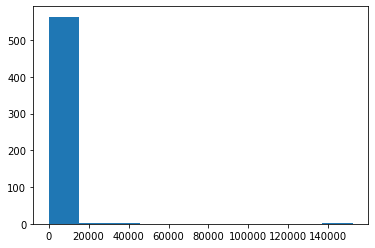

In [31]:
import matplotlib.pyplot as plt

# bins = [i*1e2 for i in range(100)]
plt.hist(data['Hectáreas Fumigadas - 2000'] )
# plt.xlim(0,0.4e5)

Contrastemos eso con las hectáreas fumigadas en el 2019. 

> Haga una gráfica con 2 histogramas:
    1. Número de hectáreas fumigadas en el 2000
    2. Número de hectáreas fumigadas en el 2019
    
¿Qué se puede inferir de esa gráfica?

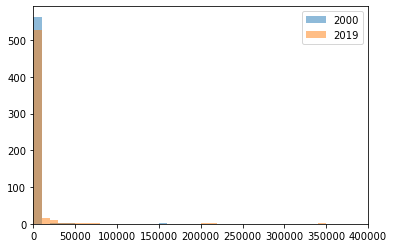

In [38]:

bins = [i*1e4 for i in range(100)]
plt.hist(data['Hectáreas Fumigadas - 2000'], bins = bins, alpha = 0.5 , label='2000')
plt.hist(data['Hectáreas Fumigadas - 2019'], bins = bins, alpha = 0.5 , label='2019')
plt.xlim(0,0.4e6)
plt.legend()

Queremos hacer más explícita la tendencia en el tiempo. 

> Haga un line plot de la cantidad total de hectáreas fumigadas en función del tiempo. 

Text(0, 0.5, 'Hectáreas fumigadas')

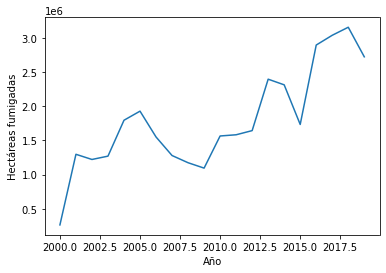

In [45]:
columnasHectareas = list(filter(lambda x: 'Hectáreas Fumigadas' in x, columnasConNumeros))
anios = [2019-i for i in range(20)]

hectareas = [data[col].sum() for col in columnasHectareas]

plt.plot(anios,hectareas)

plt.xlabel('Año')
plt.ylabel('Hectáreas fumigadas')


Una cifra interesante podría ser cúantas hectáreas se están fumigando por aplicación y si eso ha cambiado en los últimos años. Podemos calcular eso de la siguiente forma: 

$$ hectarea\_por\_aplicación = \frac{\Sigma hectareas}{\Sigma aplicaciones}$$

> Haga un line plot que visualice las hectáreas por aplicaciones en el tiempo


In [47]:
data.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'NOMBRE', 'TIPO DE EQUIPO',
       'Número Aplicaciones - 2019', 'Hectáreas Fumigadas - 2019',
       'Horas Voladas - 2019', 'Número Aplicaciones - 2018',
       'Hectáreas Fumigadas - 2018', 'Horas Voladas - 2018',
       'Número Aplicaciones - 2017', 'Hectáreas Fumigadas - 2017',
       'Horas Voladas - 2017', 'Número Aplicaciones - 2016',
       'Hectáreas Fumigadas - 2016', 'Horas Voladas - 2016',
       'Número Aplicaciones - 2015', 'Hectáreas Fumigadas - 2015',
       'Horas Voladas - 2015', 'Número Aplicaciones - 2014',
       'Hectáreas Fumigadas - 2014', 'Horas Voladas - 2014',
       'Número Aplicaciones - 2013', 'Hectáreas Fumigadas - 2013',
       'Horas Voladas - 2013', 'Número Aplicaciones - 2012',
       'Hectáreas Fumigadas - 2012', 'Horas Voladas - 2012',
       'Número Aplicaciones - 2011', 'Hectáreas Fumigadas - 2011',
       'Horas Voladas - 2011', 'Número Aplicaciones - 2010',
       'Hectáreas Fumigadas - 2010', 'Horas Voladas 

Text(0, 0.5, 'Hectáreas fumigadas por aplicacion')

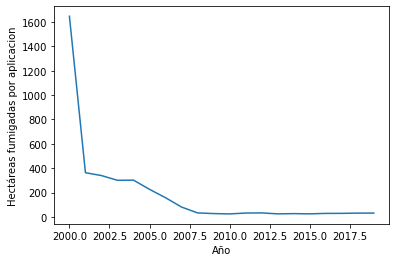

In [56]:
columnasHectareas = list(filter(lambda x: 'Hectáreas Fumigadas' in x, columnasConNumeros))
columnasApliaciones = list(filter(lambda x : 'Número Aplicaciones' in x, columnasConNumeros))
anios = [2019-i for i in range(20)]

hectareasPorAplicacion = [data[columnasHectareas[i]].sum()/data[columnasApliaciones[i]].sum() for i in range(len(columnasHectareas))]


plt.plot(anios,hectareasPorAplicacion)

plt.xlabel('Año')
plt.ylabel('Hectáreas fumigadas por aplicacion')

# Extra ejercicios

Una de las cosas más interesantes sería ver cuánto se ha fumigado por departamento en el 2019. Esto se puede hacer usando la función de pandas `groupby`. Pueden ver un mini tutorial [aca](https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/). Veamos como hacer esto por **Municipio**:

In [62]:
data.groupby('MUNICIPIO')

No devolvió nada! Pandas necesita que le digamos cómo agrupar, si queremos sumar por municipio, contar las filas, multiplicarlas, etc. En nuestro caso, queremos sumar. Para eso, se usa `.sum()`:

In [63]:
data.groupby('MUNICIPIO').sum()

,Número Aplicaciones - 2019,Hectáreas Fumigadas - 2019,Horas Voladas - 2019,Número Aplicaciones - 2018,Hectáreas Fumigadas - 2018,Horas Voladas - 2018,Número Aplicaciones - 2017,Hectáreas Fumigadas - 2017,Horas Voladas - 2017,Número Aplicaciones - 2016,...,Horas Voladas - 2003,Número Aplicaciones - 2002,Hectáreas Fumigadas - 2002,Horas Voladas - 2002,Número Aplicaciones - 2001,Hectáreas Fumigadas - 2001,Horas Voladas - 2001,Número Aplicaciones - 2000,Hectáreas Fumigadas - 2000,Horas Voladas - 2000
MUNICIPIO,,,,,,,,,,,,,,,,,,,,,
ACACIAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,158.0,16.0,4924.0,199.0,14.0,5700.0,228.0,0.0,0.0,0.0
AGUACHICA,684.0,8028.0,200.0,2214.0,12538.0,336.0,1242.0,10606.0,410.0,1650.0,...,356.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGUAZUL,976.0,15768.0,483.0,1761.0,17669.0,1098.0,3643.0,20796.0,697.0,2002.0,...,58.0,13.0,2415.0,87.0,67.0,8515.0,232.0,0.0,0.0,0.0
AGUSTIN CODAZZI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ALBAN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAGUARA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YOLOMBO,0.0,0.0,0.0,60.0,626.0,20.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YOPAL,3583.0,72521.0,1659.0,3822.0,54197.0,1363.0,5069.0,64519.0,1534.0,7011.0,...,983.0,85.0,14934.0,484.0,16.0,4350.0,145.0,0.0,0.0,0.0


Ahora tenemos la suma de cada columna numérica por municipio! 

Se pueden obtener los municipios pidiendole `.index` a la columna que queramos:




In [66]:
data.groupby('MUNICIPIO').sum()['Número Aplicaciones - 2019'].index

Index(['ACACIAS', 'AGUACHICA', 'AGUAZUL', 'AGUSTIN CODAZZI', 'ALBAN',
       'ALVARADO', 'AMBALEMA', 'APARTADO', 'ARAUCA - MUNICIPIO',
       'BARRANCA DE UPIA',
       ...
       'VILLANUEVA', 'VILLANUEVA - CASANARE', 'VILLANUEVA - GUAJIRA',
       'VILLAVICENCIO', 'VILLAVIEJA', 'YAGUARA', 'YOLOMBO', 'YOPAL', 'ZARZAL',
       'ZONA BANANERA'],
      dtype='object', name='MUNICIPIO', length=121)

> Haga un bar plot en donde cada barra tenga la cantidad de hectáreas fumigadas en el 2019 por **Departamento**

<BarContainer object of 22 artists>

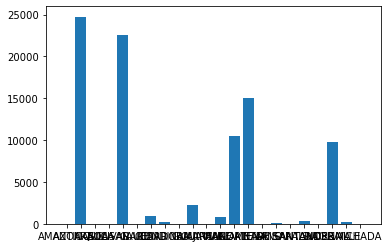

In [67]:
dptos = data.groupby('DEPARTAMENTO').sum()['Número Aplicaciones - 2019']

plt.bar(dptos.index, dptos)

plt.xticks(ori)
